In [98]:
from sklearn.metrics import accuracy_score

In [99]:
import os
os.environ["PATH"] += os.pathsep + 'usr/local/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Users/dibyanshisingh/opt/anaconda3/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptex'


In [100]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [101]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/Users/dibyanshisingh/Desktop/diabetes.csv")



In [102]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [103]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable


In [105]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [106]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [107]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))



Accuracy: 0.6796536796536796
Precision: 0.5733333333333334
Recall: 0.5058823529411764
F1 Score: 0.5375


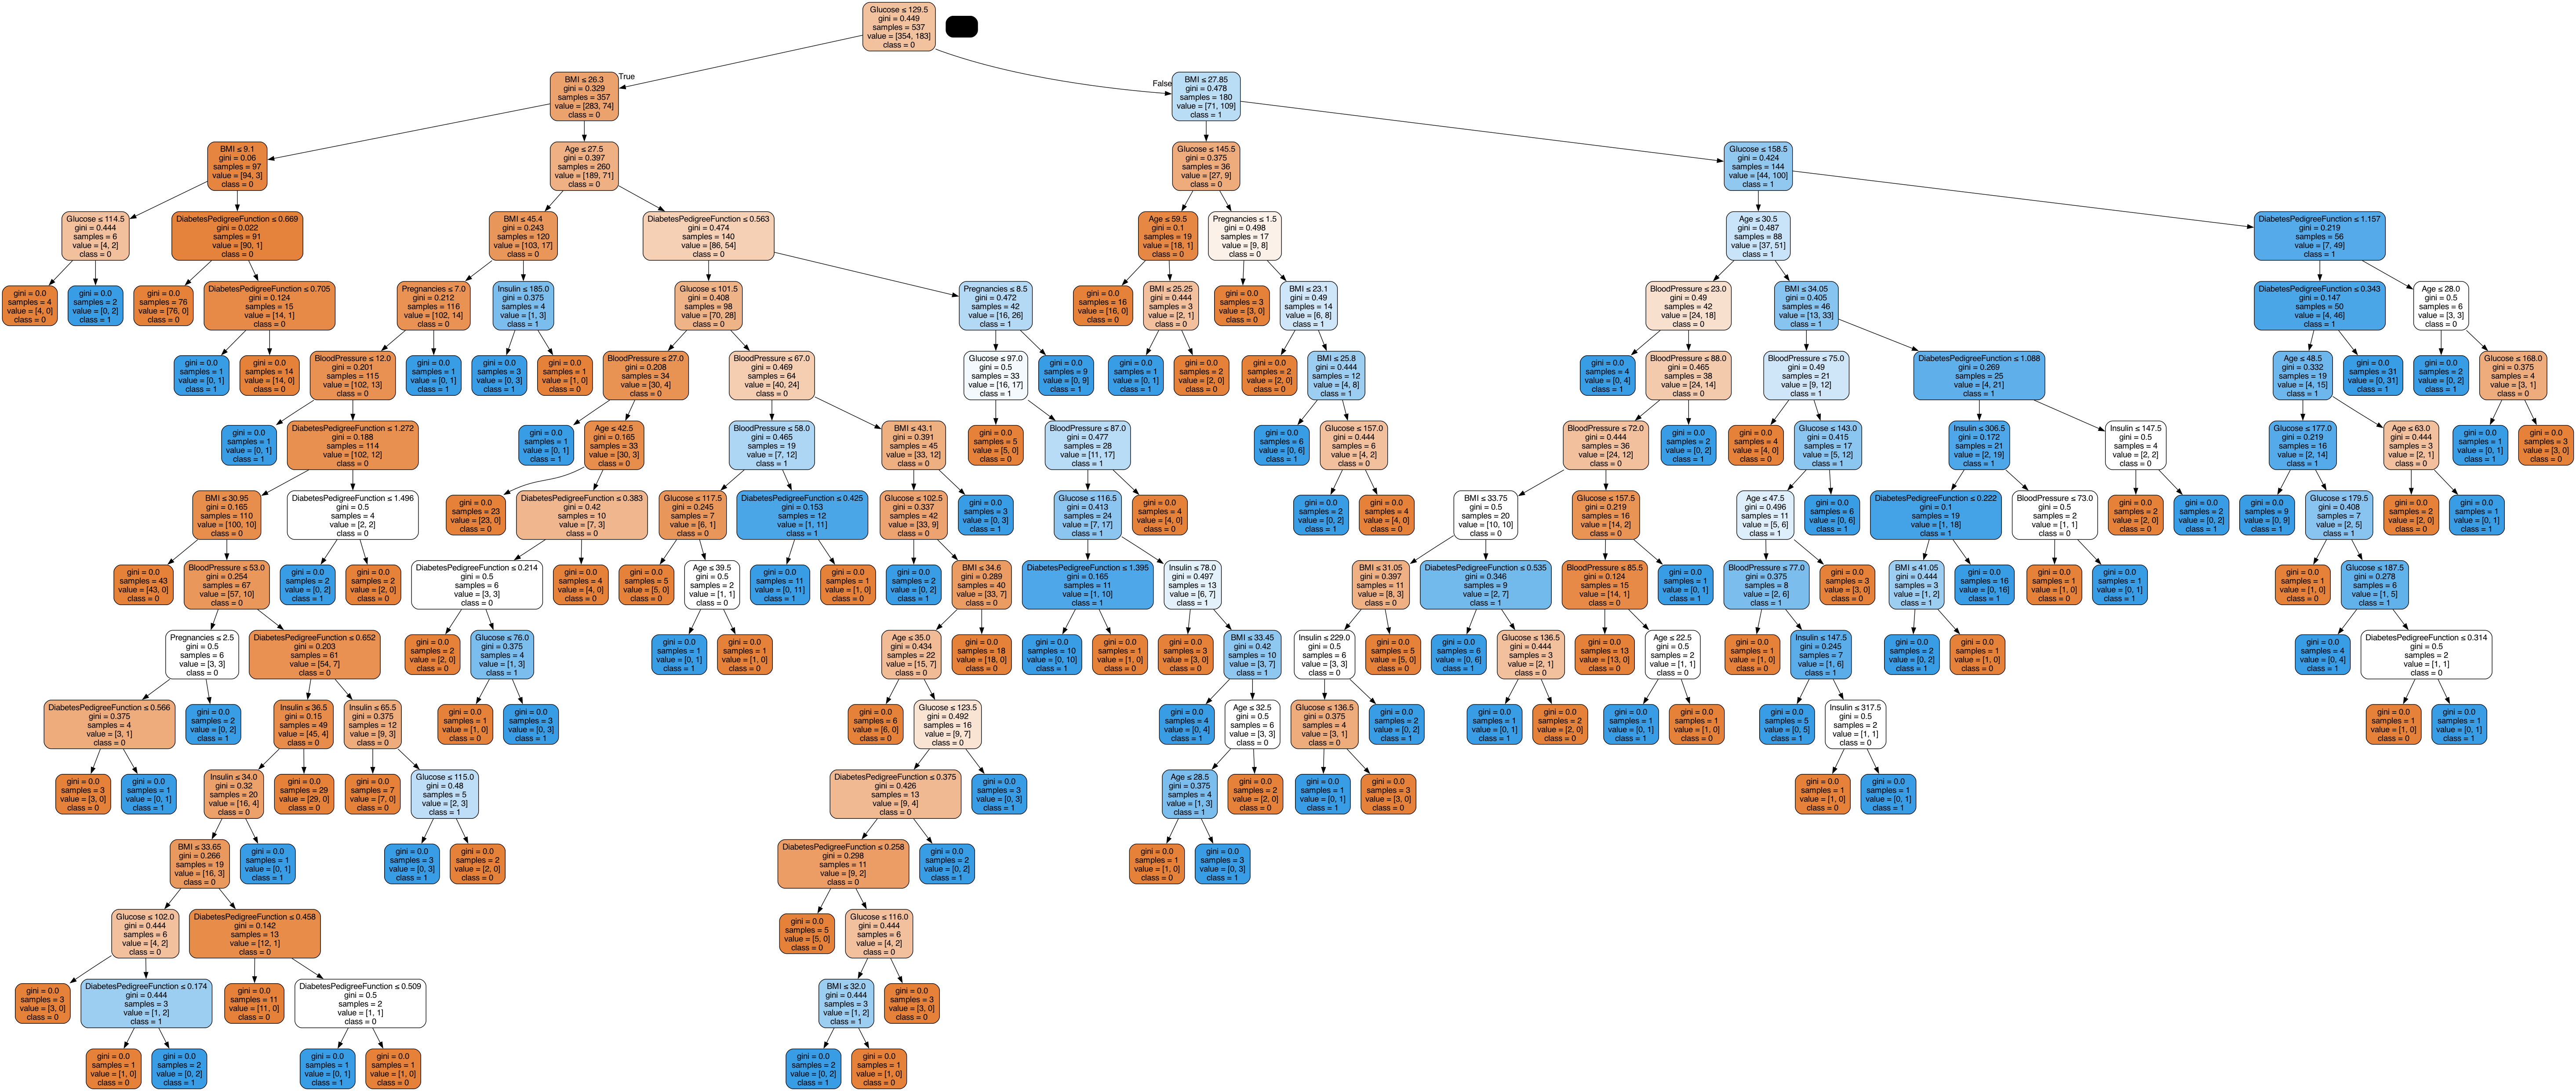

In [108]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())



In [109]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


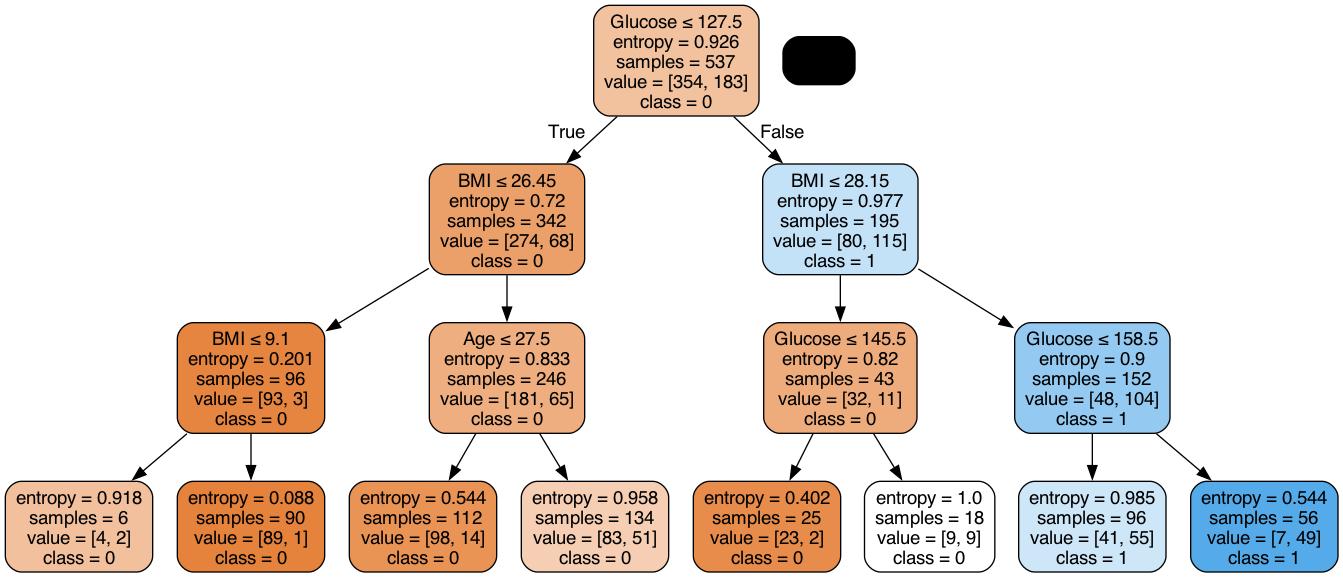

In [110]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

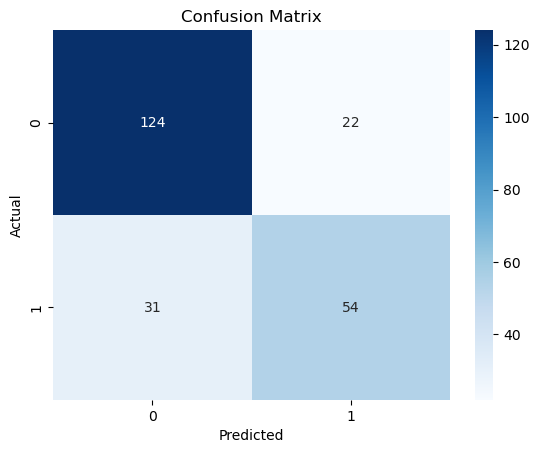

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [112]:
# Producing a risk score (e.g., between 0 and 100) for each individual, which can indicate how high their risk of developing diabetes is.

# Get probabilities of the positive class
probabilities = clf.predict_proba(X_test)[:, 1]

# Convert probabilities to risk scores between 0 and 100
risk_scores = (probabilities * 100).astype(int)

# Display the risk scores
for i, score in enumerate(risk_scores):
    print(f"Sample {i+1}: Risk Score = {score}")


Sample 1: Risk Score = 8
Sample 2: Risk Score = 50
Sample 3: Risk Score = 1
Sample 4: Risk Score = 38
Sample 5: Risk Score = 12
Sample 6: Risk Score = 12
Sample 7: Risk Score = 38
Sample 8: Risk Score = 1
Sample 9: Risk Score = 38
Sample 10: Risk Score = 12
Sample 11: Risk Score = 57
Sample 12: Risk Score = 1
Sample 13: Risk Score = 87
Sample 14: Risk Score = 57
Sample 15: Risk Score = 33
Sample 16: Risk Score = 87
Sample 17: Risk Score = 38
Sample 18: Risk Score = 38
Sample 19: Risk Score = 1
Sample 20: Risk Score = 12
Sample 21: Risk Score = 38
Sample 22: Risk Score = 38
Sample 23: Risk Score = 87
Sample 24: Risk Score = 38
Sample 25: Risk Score = 12
Sample 26: Risk Score = 57
Sample 27: Risk Score = 38
Sample 28: Risk Score = 87
Sample 29: Risk Score = 12
Sample 30: Risk Score = 57
Sample 31: Risk Score = 12
Sample 32: Risk Score = 38
Sample 33: Risk Score = 1
Sample 34: Risk Score = 87
Sample 35: Risk Score = 38
Sample 36: Risk Score = 57
Sample 37: Risk Score = 12
Sample 38: Risk 

In [113]:
#Early Detection Model:Developing a model specifically tuned for early detection of diabetes, catching cases even before all typical symptoms or signals are present.
# Creating a hypothetical early diabetes column
# Let's assume a glucose level above 120 is indicative of early diabetes (again, this is just a hypothetical example)
from imblearn.over_sampling import SMOTE

# Now, you can use SMOTE as in your code
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pima['early_diabetes'] = (pima['Glucose'] > 120) & (pima['Outcome'] == 0)

# Convert the boolean values to int
pima['early_diabetes'] = pima['early_diabetes'].astype(int)

y_early = pima['early_diabetes']
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Use DecisionTreeClassifier with high recall (this can sometimes increase false positives)
clf_early = DecisionTreeClassifier()
clf_early.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf_early.predict(X_test)


In [114]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [116]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the early detection model: {accuracy * 100:.2f}%")


Accuracy of the early detection model: 70.56%
